In [2]:
import pandas as pd
import ast

df = pd.read_csv("retrieval.csv")

# Parse the decoder_settings column and flatten it
decoder_settings_df = df['decoder_settings'].apply(ast.literal_eval).apply(pd.Series)

# Add the flattened columns to the original dataframe
df = pd.concat([df, decoder_settings_df], axis=1)

# Drop the original decoder_settings column
df = df.drop('decoder_settings', axis=1)

,n_samples,dataset,vsa,hv_dim,depth,device,time_per_sample,accuracy,final_flag,cos_sim_mean,cos_sim_std,beam_size,initial_limit,limit,pruning_method,use_size_aware_pruning
0,100,zinc,HRR,5120,3,cuda,2.435757,0.22,72.0,0.979959,0.029705,4,1024,256,cos_sim,True
1,100,zinc,HRR,5120,3,cuda,2.816772,0.24,73.0,0.983212,0.022930,8,1024,256,cos_sim,True
2,100,zinc,HRR,5120,3,cuda,3.160146,0.27,73.0,0.987829,0.016006,16,1024,256,cos_sim,True
3,100,zinc,HRR,5120,3,cuda,4.187965,0.26,76.0,0.988918,0.015710,32,1024,256,cos_sim,True
4,100,zinc,HRR,5120,4,cuda,2.479202,0.19,62.0,0.978072,0.045888,4,1024,256,cos_sim,True
5,100,zinc,HRR,5120,4,cuda,2.926973,0.22,68.0,0.983707,0.034963,8,1024,256,cos_sim,True
6,100,zinc,HRR,5120,4,cuda,3.248469,0.25,69.0,0.985061,0.035037,16,1024,256,cos_sim,True
7,100,zinc,HRR,5120,4,cuda,4.236228,0.29,70.0,0.985571,0.036173,32,1024,256,cos_sim,True
8,100,zinc,HRR,5120,5,cuda,2.419687,0.25,57.0,0.954556,0.135825,4,1024,256,cos_sim,True
9,100,zinc,HRR,5120,5,cuda,2.879808,0.26,63.0,0.968359,0.107356,8,1024,256,cos_sim,True


## Effect of Depth on Accuracy, Final Flags, and Cosine Similarity (Grouped by hv_dim)

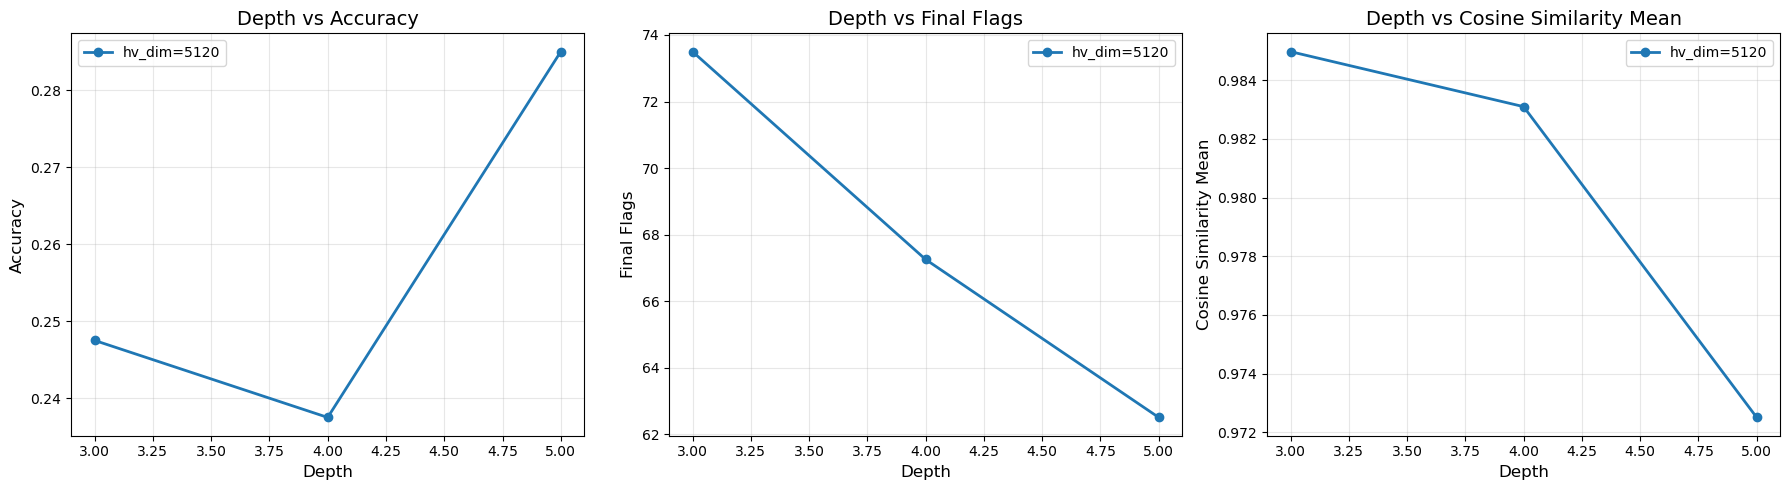

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['accuracy', 'final_flag', 'cos_sim_mean']
titles = ['Depth vs Accuracy', 'Depth vs Final Flags', 'Depth vs Cosine Similarity Mean']
ylabels = ['Accuracy', 'Final Flags', 'Cosine Similarity Mean']

for hv_dim in df['hv_dim'].unique():
    df_hv = df[df['hv_dim'] == hv_dim]

    for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
        ax = axes[idx]

        grouped = df_hv.groupby('depth')[metric].mean()
        ax.plot(grouped.index, grouped.values, marker='o', label=f'hv_dim={hv_dim}', linewidth=2)

        ax.set_xlabel('Depth', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

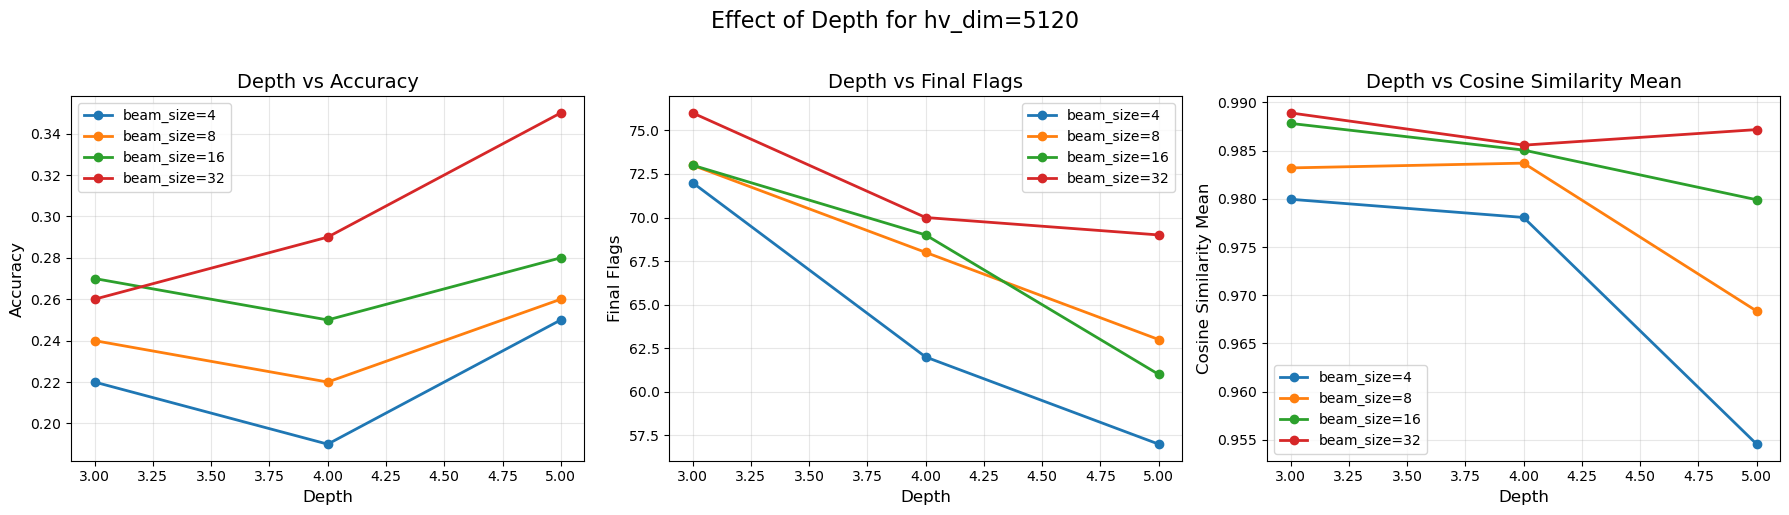

In [7]:
for hv_dim in df['hv_dim'].unique():
    df_hv = df[df['hv_dim'] == hv_dim]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Effect of Depth for hv_dim={hv_dim}', fontsize=16, y=1.02)

    for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
        ax = axes[idx]

        for beam_size in sorted(df_hv['beam_size'].unique()):
            df_beam = df_hv[df_hv['beam_size'] == beam_size]
            grouped = df_beam.groupby('depth')[metric].mean()
            ax.plot(grouped.index, grouped.values, marker='o', label=f'beam_size={beam_size}', linewidth=2)

        ax.set_xlabel('Depth', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
